# Student Score Prediction using Linear Regression

### Goals
In this project I will: 
- Implement Linear Regression
- [Grdient Descent](https://www.youtube.com/watch?v=sDv4f4s2SB8)

### Tools
- Pandas
- Matplotlib

### Problem Statement
The amount of time students spent studying and their corresponding scores have been provided in a dataset. I would like to fit a `linear regression model` through these points, so I can then predict the score for other students.

In [1]:
#importing all the needed packages
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [2]:
#reading the data
data = pd.read_csv('data.csv')
data

,time,score
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299
...,...,...
95,3.561,19.128
96,0.301,5.609
97,7.163,41.444
98,0.309,12.027


### Plotting The Data
I am plotting these points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

I will also use other functions in the `matplotlib` library to set the title and labels to display

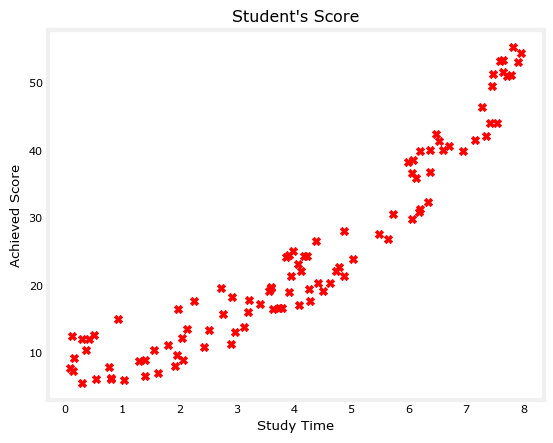

In [3]:
#plotting the data
plt.scatter(data.time, data.score, marker='X', c='r')
plt.title("Student's Score")
plt.xlabel('Study Time')
plt.ylabel('Achieved Score')
plt.show()

### Using Gradient Descent Algorithm to Fit a Line Through the Data

We first need a funcion for the straight line:

<figure>
 <img align="left" src="./images/one.png">
</figure>

<br>
Here, y hat is the predicted score. $w$ and $b$ are the variables that we are going to tweak to get the best fitted line through the data.

We also need a `Loss Function`:

<figure>
 <img align="left" src="./images/two.png" style="width:501px;height:155px;">
</figure>
<figure>
 <img align="left" src="./images/three.png"   style="width:669px;height:151px;">
</figure>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Loss Function is also called <b>Error Function</b>

We want to find $w$ and $b$ so we can minimize the Loss Function.<br>
We can do that by taking the `Partial Derivarive` of $E$ with respect to $w$ and $b$.

<figure>
 <img align="right" src="./images/four.png">
</figure>
Partial Derivarive of $E$ with respect to $w$:

<figure>
 <img align="right" src="./images/five.png">
</figure>
Partial Derivarive of $E$ with respect to $b$:

In [4]:
def gradient_descent(w, b, points):
    
    #learning rate
    L = 0.001
    
    #number of training examples
    m = len(points)
    
    #total steps to run namely total iteration
    steps = 5000
    
    while True:
        
        w_gradient = 0
        b_gradient = 0
        
        for i in range(m):
            x = points.iloc[i].time
            y = points.iloc[i].score
            
            w_gradient += (-2 / m) * x * (y - (w * x - b)) ** 2
            b_gradient += (-2 / m) * (y - (w * x - b)) ** 2
        
        #step size for w
        step_w = w_gradient * L
        w = w - step_w
        
        #step size for b
        step_b = b_gradient * L
        b = b - step_b
        
        steps -= 1
        
        #minimum step size is 0.0001
        if steps == 0 or (step_w < 0.0001 and step_b < 0.0001):
            break
            
    return w, b

> **Note**: I found $w$, $b$, Learning Rate, Number of Steps and Step Sizes to be very sensitive.
I tweaked this values here and there and found current state of these assigned values to be somewhat good.

In [5]:
w = 5
b = 0

w, b = gradient_descent(w, b, data)
w, b

(5.4582137560842, 0.08338069814000001)

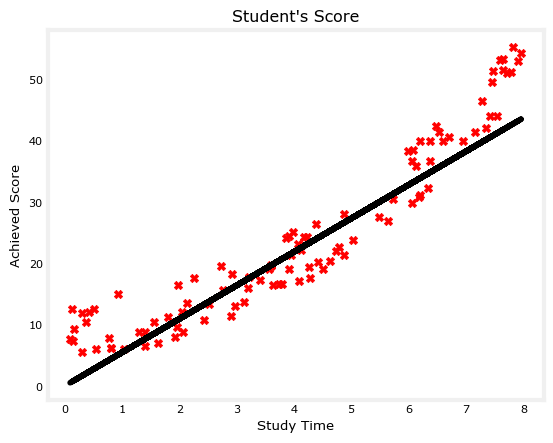

In [6]:
#plotting the data
m = len(data)
y_hat = []
for i in range(m):
    y_hat.append((data.time[i] * w + b))

plt.plot(data.time, y_hat, c='black')
plt.scatter(data.time, data.score, marker='X', c='red')
plt.title("Student's Score")
plt.xlabel('Study Time')
plt.ylabel('Achieved Score')
plt.show()

In [7]:
#Predicted score of a student according to his time
time_spent = 3.4
got_score = w * time_spent + b
f"Student got {got_score}"

'Student got 18.64130746882628'